# Automorphisms of Graphs



## First Example: The graph of a square

Let's look at the graph of a square. Since a square is a 2-cube, we can create the polytope and look at its graph:

    


In [2]:
$c=cube(2);
$c->GRAPH->VISUAL;

<!--
polymake for andrew
Thu Apr 4 11:21:35 2019
unnamed
-->


 
 
 unnamed 
 
 

 

 
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 

 


 
 Display 
 
 
 Labels 
 
 


 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.


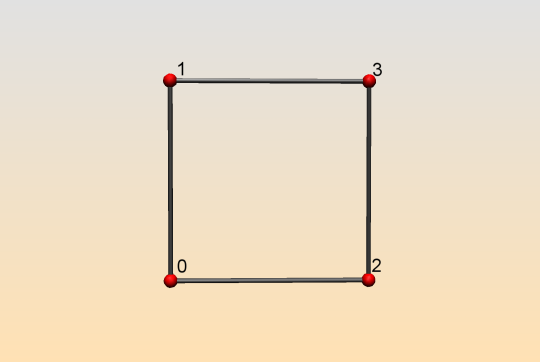

To study the automorphisms of this graph, we create a `props::Graph` object refering to the `C++` class named `Graph` (see the [tutorial on graphs](apps_graph) for more details):

    


In [3]:
$g=new props::Graph($c->GRAPH->ADJACENCY);


The picture of the graph shows that the node with label 0 is adjacent to the nodes 1 and 2, Node 1 is adjacent to 0 and 3, and so on. For the complete adjacency information you can print `$c->GRAPH->ADJACENCY` or just the props::Graph object `$g`:

    


In [4]:
print rows_labeled($g);

0:1 2
1:0 3
2:0 3
3:1 2


Now, we compute the generators of the automorphism group of this graph (see the [tutorial on groups](apps_group) for more info):

    


In [5]:
$aut=automorphisms($g);

Click here for additional output 
 
polymake: used package nauty
 Computation of automorphism groups of graphs.
 Copyright by Brendan McKay and Adolfo Piperno.
 http://pallini.di.uniroma1.it/


In this case, the automorphism group has two generators:

    


In [6]:
print $aut;

0 2 1 3
1 0 3 2


Each generator is a permutation on the nodes. The first generator fixes the nodes 0 and 3, and exchanges the nodes 1 and 2, i.e., it describes the reflection along the diagonal through 0 and 3. The second generator is the reflection along the horizontal line.

In order to be able to work with the group, we create a new Group object, which lives in the application `group`:

    


In [7]:
$action = new group::PermutationAction(GENERATORS => $aut);
$autgroup = new group::Group(PERMUTATION_ACTION => $action);


Now we can ask for basic properties of the group, e.g., the number of elements:

    


In [8]:
print $autgroup->ORDER;

8

Click here for additional output 
 
polymake: used package permlib
 A callable C++ library for permutation computations. 
 Written by Thomas Rehn.
 http://www.math.uni-rostock.de/~rehn/software/permlib.html

Sometimes, it is useful to know which elements of the group fix a specific set of indices, that is, we are interested in the subgroup which is the stabilizer of the given set. In the first case, we just fix the index 0:

    


In [9]:
$s0=new Set<Int>(0);
$stab0=group::stabilizer_of_set($action,$s0);


We learn that the node 0 is only fixed by the permutation `0 2 1 3`:

    


In [10]:
print $stab0->ORDER;

2

In [11]:
print $stab0->PERMUTATION_ACTION->GENERATORS;

0 2 1 3


In the second case, we look at the subgroup which leaves the set `{1,2}` invariant: 

    


In [12]:
$s12=new Set<Int>(1,2);
$stab12=group::stabilizer_of_set($action,$s12);


Now, we obtain a group of order 4:

    


In [13]:
print $stab12->ORDER;

4

In [14]:
print $stab12->PERMUTATION_ACTION->GENERATORS;

3 1 2 0
0 2 1 3


Finally, we compute the orbits of the indices under the three different groups:

    


In [15]:
print $stab0->PERMUTATION_ACTION->ORBITS;

{0}
{1 2}
{3}


In [16]:
print $stab12->PERMUTATION_ACTION->ORBITS;

{0 3}
{1 2}


In [17]:
print $autgroup->PERMUTATION_ACTION->ORBITS;

{0 1 2 3}
